# Preprocessing Code

In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Directory containing the numpy format images
directory = '/kaggle/input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices'
output_directory = '/kaggle/working/training-images'  # Directory to save the clipped numpy files

# Ensure the output directory exists, if not, create it
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Initialize empty lists to store minimum and maximum pixel values
min_values = []
max_values = []
clip_min = -10  # Example threshold for lower end
clip_max = 10   # Example threshold for higher end

# Iterate through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.npy'):
        # Load the numpy array
        image = np.load(os.path.join(directory, filename))
       
        cwt_images_clipped = np.clip(image, clip_min, clip_max)
        
        # Save the images
        output_filename = os.path.join(output_directory, filename)
        np.save(output_filename, cwt_images_clipped)

        # Get the minimum and maximum pixel values in the image
        min_value = np.min(cwt_images_clipped)
        max_value = np.max(cwt_images_clipped)
        
        # Append the minimum and maximum values to the respective lists
        min_values.append(min_value)
        max_values.append(max_value)

# Convert the lists to numpy arrays for easier manipulation
min_values = np.array(min_values)
max_values = np.array(max_values)

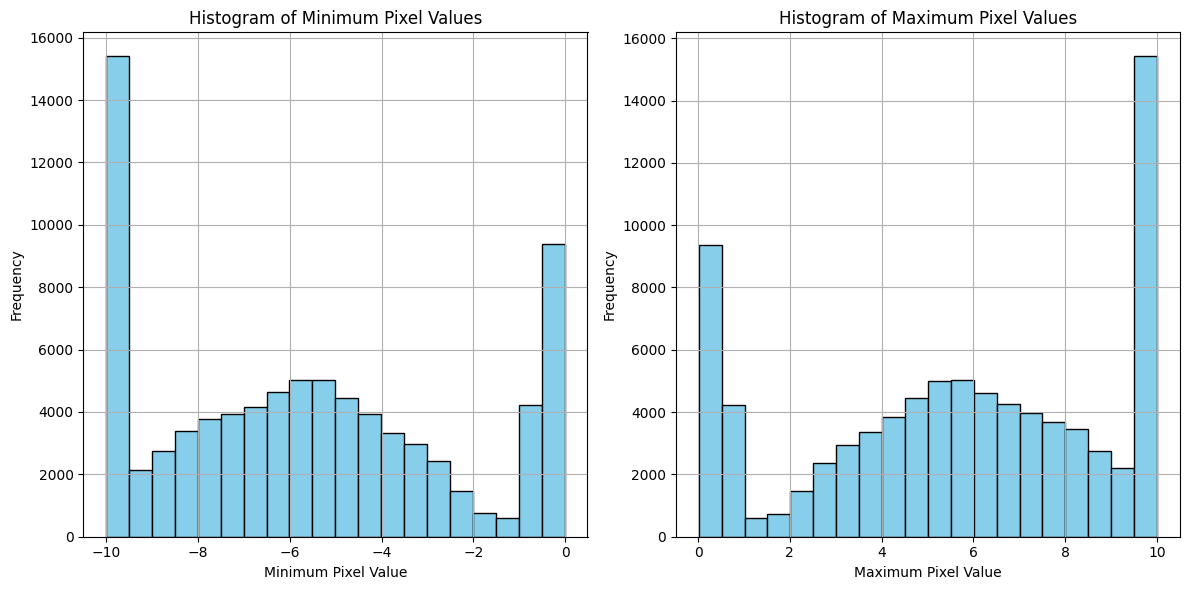

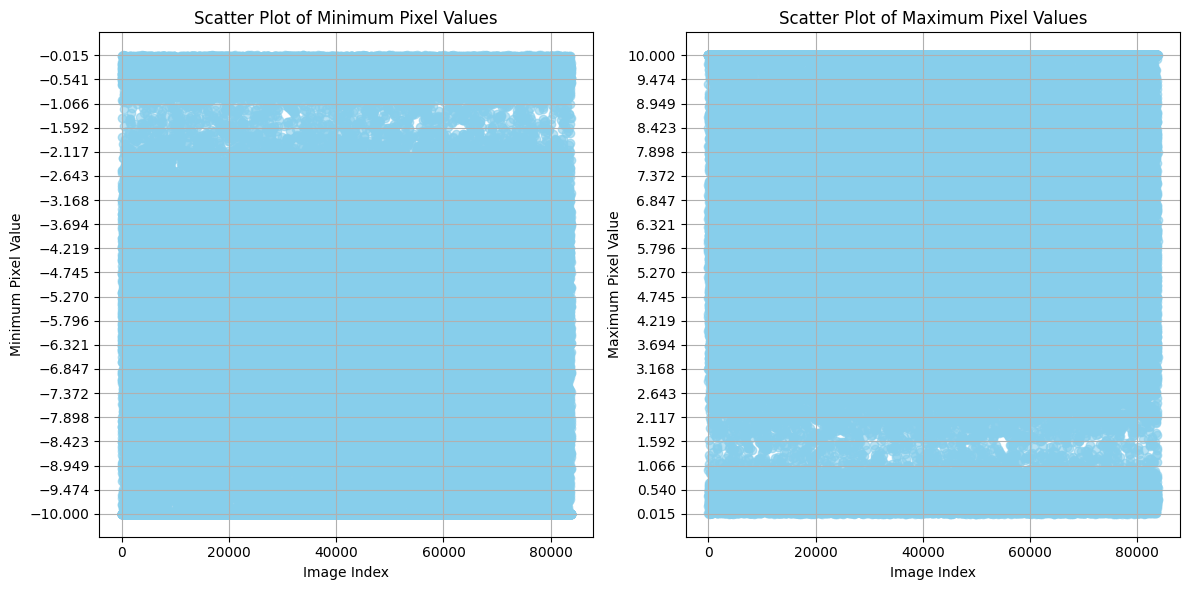

In [12]:
plt.figure(figsize=(12, 6))
# Plot histogram for minimum pixel values
plt.subplot(1, 2, 1)
plt.hist(min_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Minimum Pixel Values')
plt.xlabel('Minimum Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

# Plot histogram for maximum pixel values
plt.subplot(1, 2, 2)
plt.hist(max_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Maximum Pixel Values')
plt.xlabel('Maximum Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

#  Plot scatter plot for minimum pixel values
plt.subplot(1, 2, 1)
plt.scatter(range(len(min_values)), min_values, color='skyblue', alpha=0.6)
plt.title('Scatter Plot of Minimum Pixel Values')
plt.xlabel('Image Index')
plt.ylabel('Minimum Pixel Value')
plt.grid(True)
plt.yticks(np.linspace(min(min_values), max(min_values), num=20))  # Adjust y-axis ticks

# Plot scatter plot for maximum pixel values
plt.subplot(1, 2, 2)
plt.scatter(range(len(max_values)), max_values, color='skyblue', alpha=0.6)
plt.title('Scatter Plot of Maximum Pixel Values')
plt.xlabel('Image Index')
plt.ylabel('Maximum Pixel Value')
plt.grid(True)
plt.yticks(np.linspace(min(max_values), max(max_values), num=20))  # Adjust y-axis ticks

plt.tight_layout()
plt.show()

# Training Code

In [9]:
!pwd

/kaggle/working


In [13]:
cd ../input/mae-single-02/mae_one_channel

/kaggle/input/mae-single-02/mae_one_channel


In [15]:
!python main_pretrain.py --output_dir ../../../working/output --epochs 15 --input_height 96 --input_width 448 --image_channels 1 --norm_pix_loss --warmup_epochs 3 --data_dir ../../../working/training-images --log_dir ../../../working/logs --num_workers 4 --local_rank 0

2024-05-14 04:43:30.833573: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 04:43:30.833638: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 04:43:30.835335: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Not using distributed mode
[04:43:36.245700] job dir: /kaggle/input/mae-single-02/mae_one_channel
[04:43:36.245784] Namespace(batch_size=64,
epochs=15,
accum_iter=1,
model='mae_vit_large_patch16',
input_height=96,
input_width=448,
image_channels=1,
mask_ratio=0.75,
norm_pix_loss=True,
weight_decay=0.05,
lr=None,
blr=0.001,
min_lr=0.0,
warmup_epochs=3,
data_dir='.

# Downloading Script

In [65]:
!pwd

/kaggle/input/mae-single-02/mae_one_channel


In [19]:
cd ../../../working

/kaggle/working


In [23]:
!ls

checkpoint-14.pth  checkpoint-7.pth  log.txt


In [25]:
!zip -r file.zip /kaggle/working/output/checkpoint-14.pth

  adding: kaggle/working/output/checkpoint-14.pth (deflated 7%)


In [26]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/output/file.zip

In [24]:
from IPython.display import FileLink
FileLink(r'checkpoint-14.pth')

/kaggle/working/output/checkpoint-14.pth

In [77]:
cd ..

/kaggle/input/mae-single-02


In [64]:
import gc
gc.collect()
torch.cuda.empty_cache()

# Test Code

In [66]:
import sys
import os
import requests

import torch
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

In [67]:
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    # assert image.shape[2] == 3
    # image = (torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int()).numpy().astype(np.uint8)
    
    plt.imshow(image ,cmap='bone',aspect='auto')
    # plt.title(title, fontsize=16)
    # plt.axis('off')
    # plt.imsave('../../../working/mask.jpg', image)
    return

In [86]:
models_mae

1

In [90]:
mae

<module 'mae_one_channel.models_mae' from '/kaggle/input/mae-single-02/mae_one_channel/models_mae.py'>

In [101]:
!pwd
import mae_one_channel.models_mae as mae

def prepare_model(chkpt_dir, arch='mae_vit_large_patch16'):
    # build model
    model = getattr(mae, arch)(img_width=448, img_height=96, img_channels=1)
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    msg = model.load_state_dict(checkpoint['model'], strict=False)
    print(msg)
    return model

/kaggle/input/mae-single-02


In [132]:
def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.25)
    print("y", y.shape)
    y = model.unpatchify(y, 96, 448, 1)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()
    print("y", y.shape)
    print("mask", mask.shape)

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 * 1)  # (N, H*W, p*p*3)
    print("mask", mask.shape)
    mask = model.unpatchify(mask, 96, 448, 1)  # 1 is removing, 0 is keeping
    print("mask", mask.shape)
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    print("mask", mask.shape)
    
    x = torch.einsum('nchw->nhwc', x)
    print("x", x.shape)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [28, 24]

    # Plotting
    plt.figure()

    plt.subplot(4, 1, 1)
    show_image(x[0], "original")

    plt.subplot(4, 1, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(4, 1, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(4, 1, 4)
    show_image(im_paste[0], "reconstruction + visible")

    # Adjust layout to prevent overlapping axes
    plt.tight_layout()

    plt.show()


(96, 448, 1)


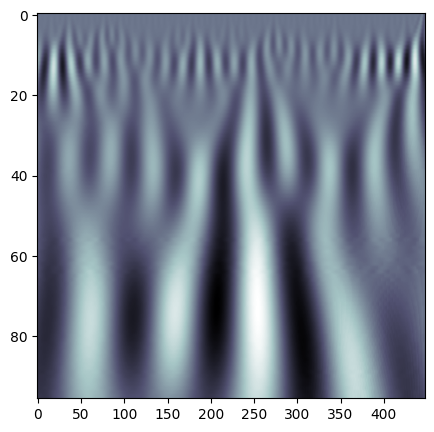

In [123]:
# load an image
# img_url = 'https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg' # fox, from ILSVRC2012_val_00046145
# img_url = 'https://user-images.githubusercontent.com/11435359/147743081-0428eecf-89e5-4e07-8da5-a30fd73cc0ba.jpg' # cucumber, from ILSVRC2012_val_00047851
img_path = '/kaggle/working/training-images/eeg_0_1_cwt.npy'
# img = Image.open(img_path)
# img = img.resize((224, 224))
# img = np.array(img) / 255.

# assert img.shape == (240, 272, 3)
image = np.load(img_path)
if image.shape[0] == 99 and image.shape[1] == 450:
    image = image[3::, 2::]
image = np.expand_dims(image, axis=-1)
# image = np.transpose(image, (1, 0, 2))
print(image.shape)

# normalize by ImageNet mean and std
# img = img - imagenet_mean
# img = img / imagenet_std

plt.rcParams['figure.figsize'] = [5, 5]
show_image(torch.tensor(image))

In [124]:
chkpt_dir = '/kaggle/working/output/checkpoint-14.pth'
model_mae = prepare_model(chkpt_dir, 'mae_vit_large_patch16')
print('Model loaded.')

<All keys matched successfully>
Model loaded.


MAE with pixel reconstruction:
y torch.Size([1, 168, 256])
y torch.Size([1, 96, 448, 1])
mask torch.Size([1, 168])
mask torch.Size([1, 168, 256])
mask torch.Size([1, 1, 96, 448])
mask torch.Size([1, 96, 448, 1])
x torch.Size([1, 96, 448, 1])


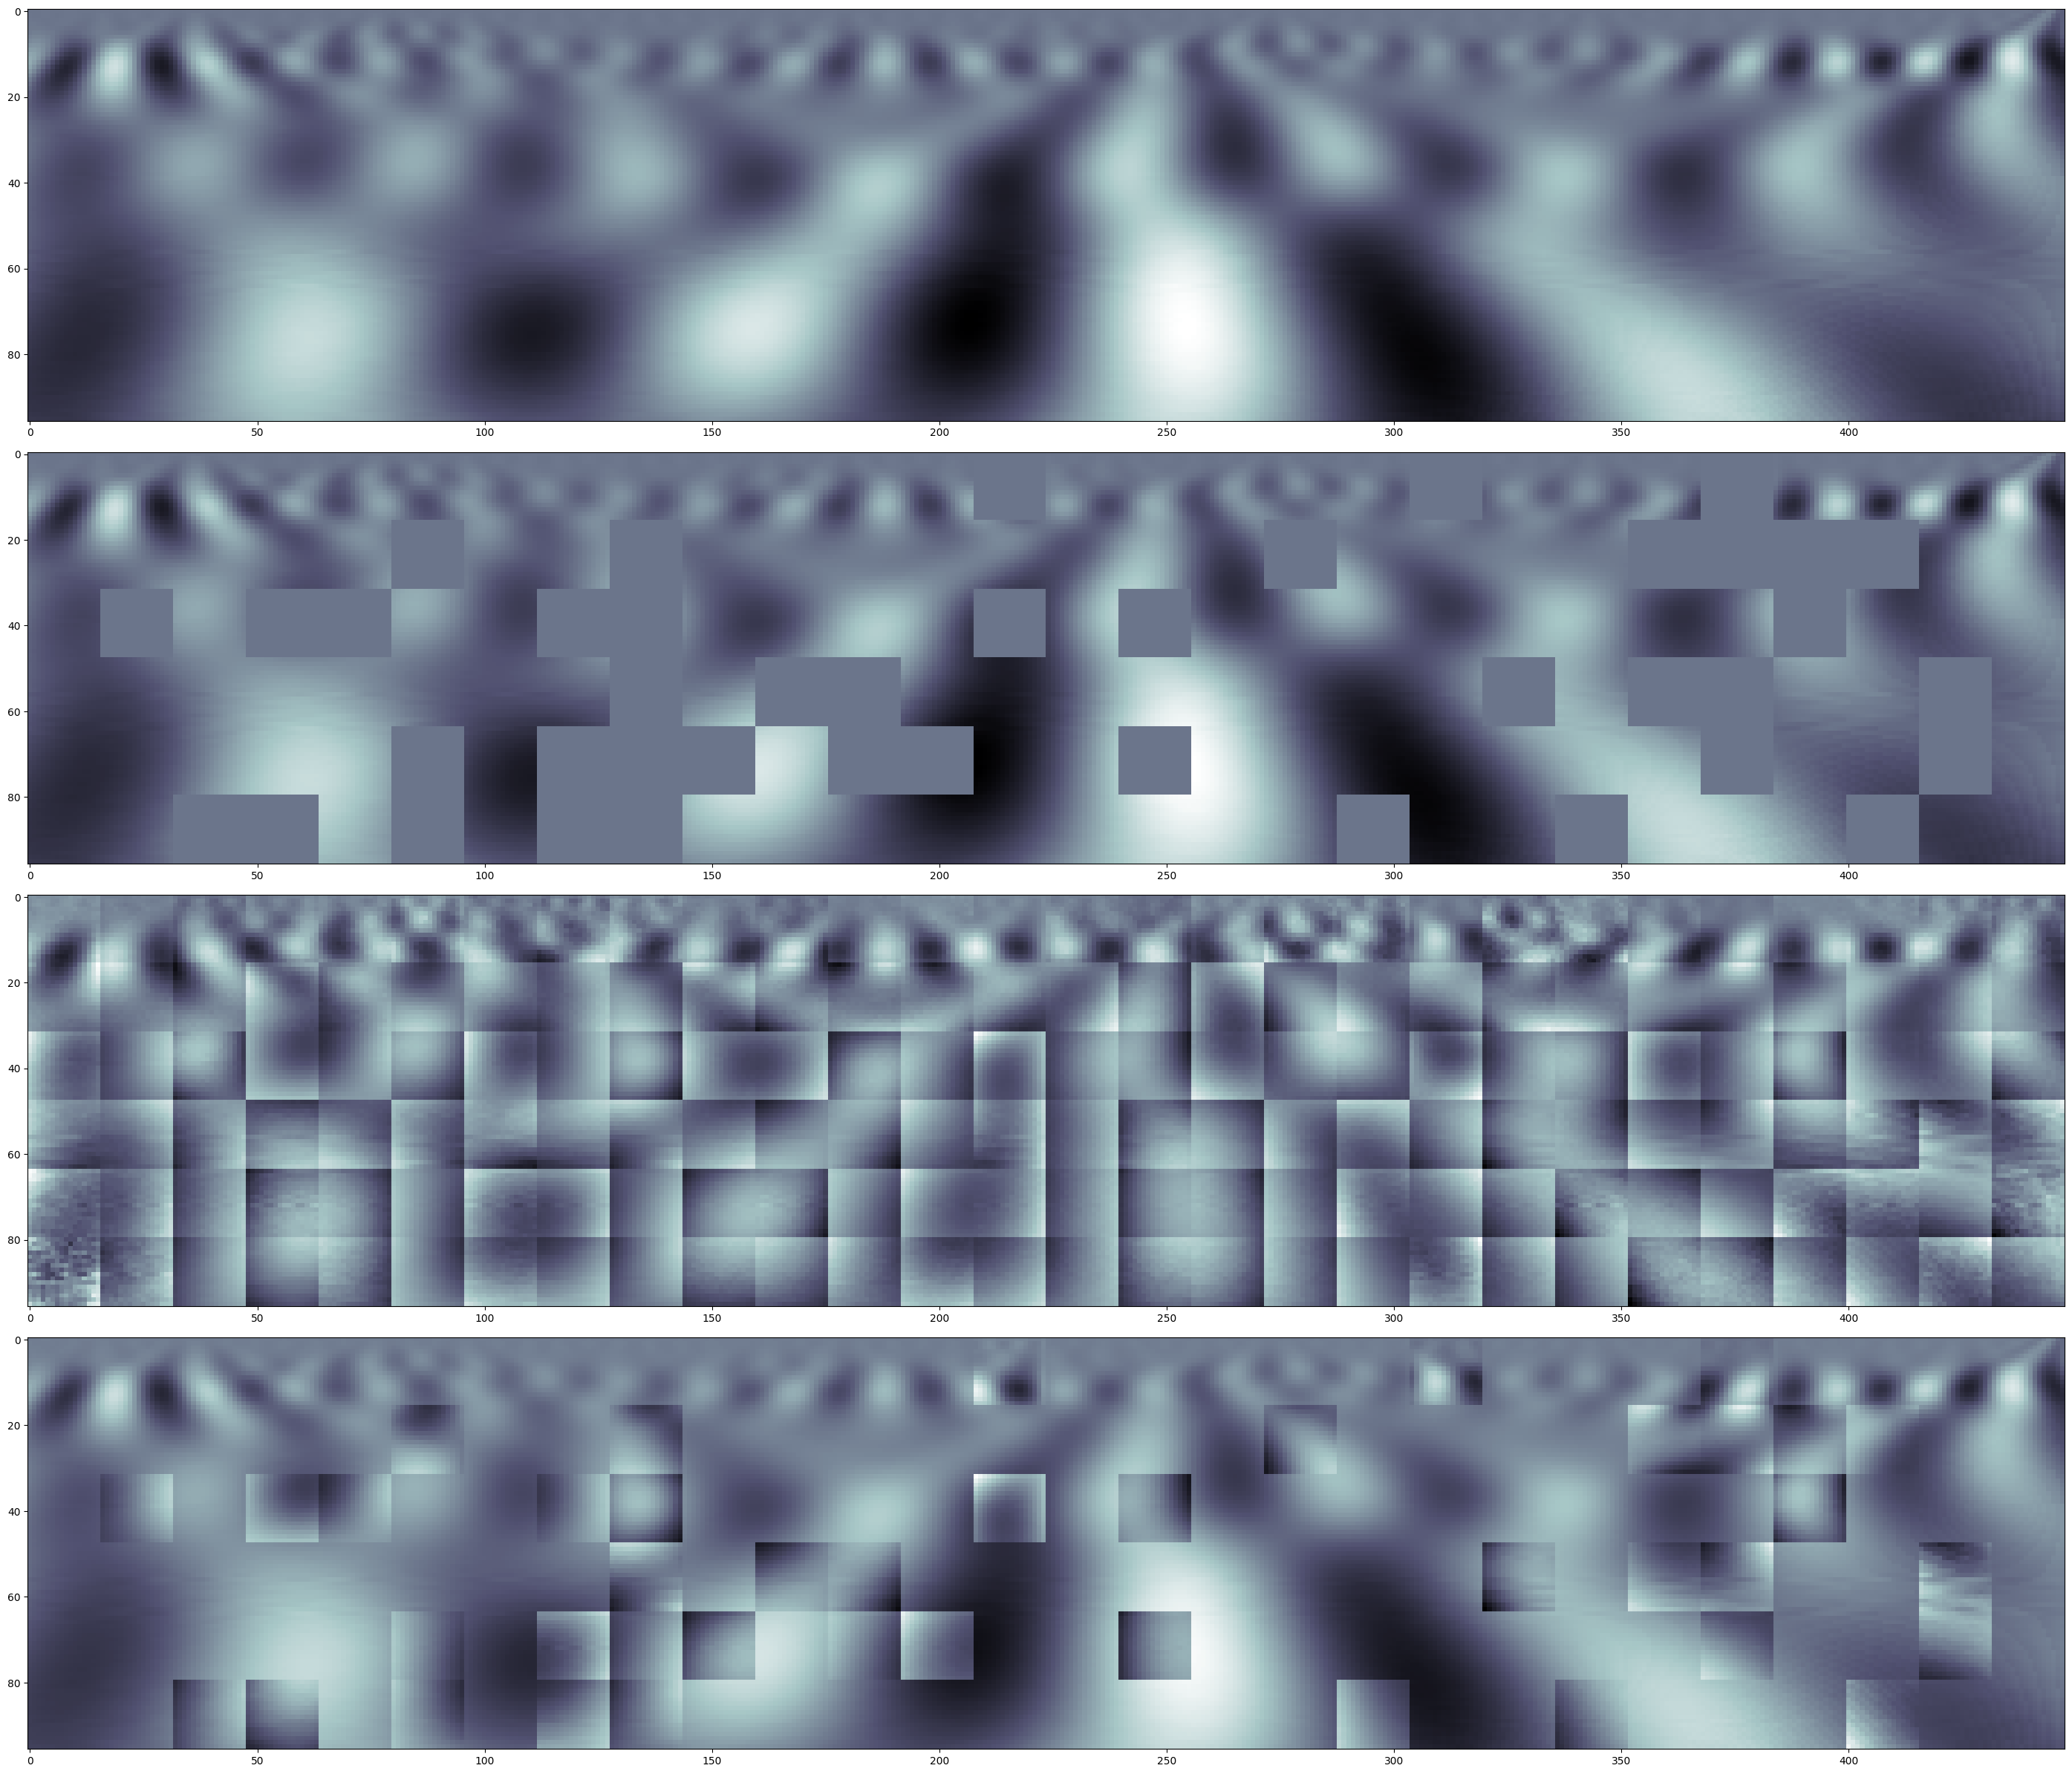

In [133]:
# make random mask reproducible (comment out to make it change)
torch.manual_seed(2)
print('MAE with pixel reconstruction:')
run_one_image(image, model_mae)

# Faaltu pange

(448, 96)
(448, 96)
(448, 96)
(448, 96)
(448, 96)
(448, 96)
(448, 96)


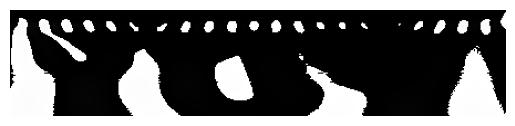

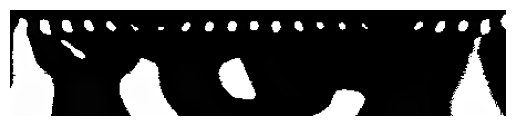

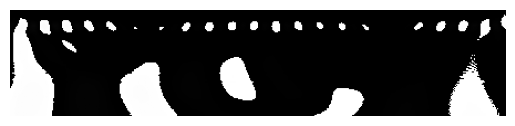

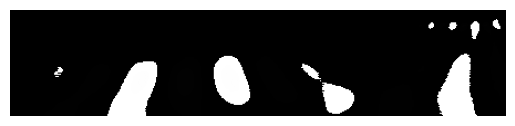

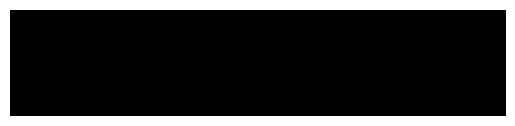

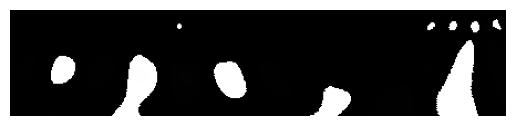

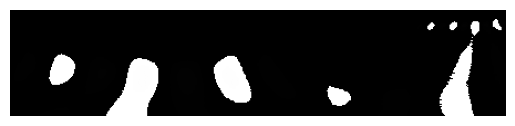

In [46]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

for i in range(1,8):
    img_path = f"../input/dhruv-cwt-matrices-eeg-dataset/cwt_matrices/eeg_10001_{i}_cwt.npy"
    
    # As a numpy array
    image = np.load(img_path)
    image = image.astype(np.float32) / 255.0 
    image = (image * 255).astype(np.uint8)
    
    # Converting to PIL
    image = Image.fromarray(image).resize((448, 96), resample = Image.NEAREST)
    if image.mode != 'RGB':
        image = Image.merge("RGB", (image, image, image))
    print(image.size)
    
    # Converting to torch tensor
    transform = transforms.ToTensor()
    image = transform(image)
    
    # Plotting
    plt.figure()
    plt.imshow(image.permute(1, 2, 0).numpy(), cmap = "bone")
    plt.axis('off')

In [29]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(1,8):
    img_path = f"../../dhruv-cwt-matrices-eeg-dataset/cwt_matrices/eeg_10001_{i}_cwt.npy"
    image = np.load(img_path)
    if image.shape[0] == 99 and image.shape[1] == 450:
        image = image[3::, 2::]
    if len(image.shape) == 2:
        image = np.stack((image, image, image), axis=-1)
    print(image.shape)
    plt.figure(figsize=(4,4))
    plt.imshow(np.abs(image),cmap='bone',aspect='auto')

(96, 448, 3)
(96, 448, 3)
(96, 448, 3)
(96, 448, 3)
(96, 448, 3)
(96, 448, 3)
(96, 448, 3)
Error in callback <function _draw_all_if_interactive at 0x79763fb17130> (for post_execute), with arguments args (),kwargs {}:


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 400x400 with 1 Axes>

ValueError: Unsupported dtype

<Figure size 400x400 with 1 Axes>

ValueError: Unsupported dtype

<Figure size 400x400 with 1 Axes>

ValueError: Unsupported dtype

<Figure size 400x400 with 1 Axes>

ValueError: Unsupported dtype

<Figure size 400x400 with 1 Axes>

ValueError: Unsupported dtype

<Figure size 400x400 with 1 Axes>

ValueError: Unsupported dtype

<Figure size 400x400 with 1 Axes>